In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram

### Histograms

In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

In [5]:
#bell state circuit
bell = QuantumCircuit(q, c)
bell.h(q[0])
bell.cx(q[0], q[1])

meas = QuantumCircuit(q, c)
meas.measure(q, c)

In [11]:
# execute quantum circuit
backend = BasicAer.get_backend('qasm_simulator')
circ = bell + meas
result = execute(circ, backend, shots = 1000).result()
counts = result.get_counts(circ)
print(counts)

{'00': 503, '11': 497}


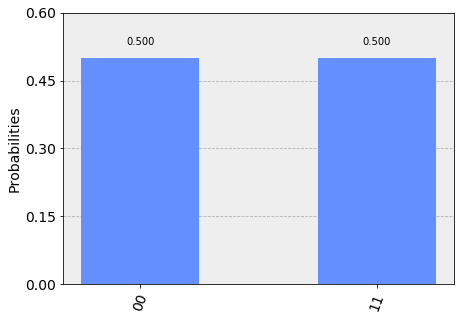

In [10]:
plot_histogram(counts)

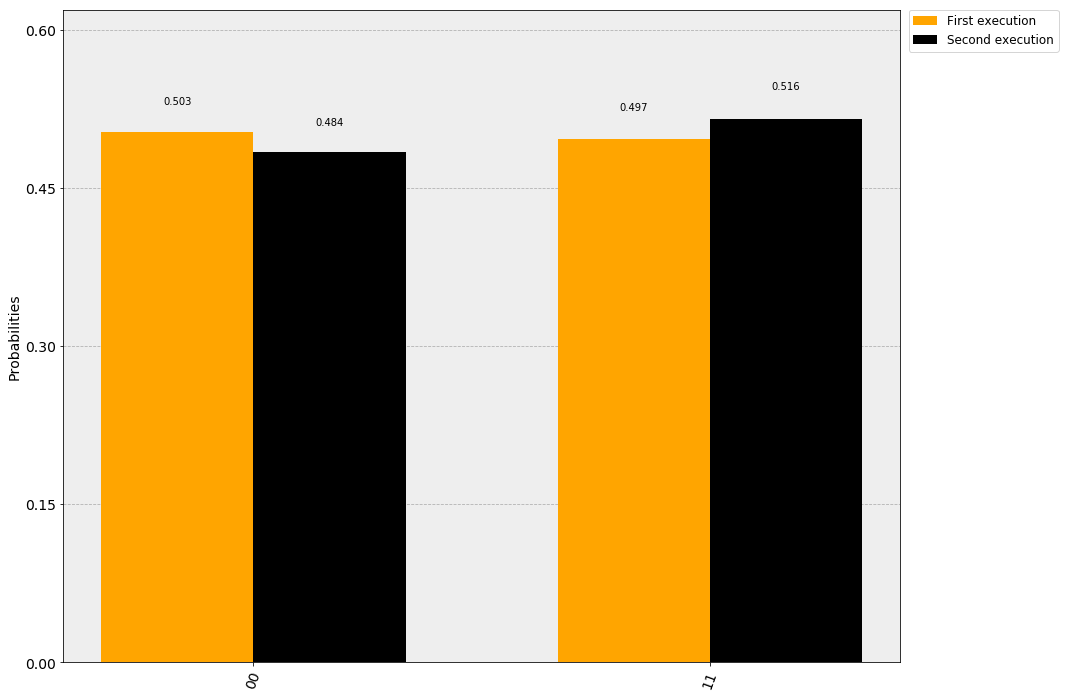

In [13]:
# second execution
second_result = execute(circ, backend, shots = 1000).result()
second_counts = second_result.get_counts(circ)
# plot with legend, color, figsize
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend = legend, color=['orange', 'black'], figsize = (15, 12))

## plot state/tomography

useful for debugging, uses a lot of resources 

plot_state_city, plot_state_paulivec, [...]_qsphere, _hinton, _multivector


In [14]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

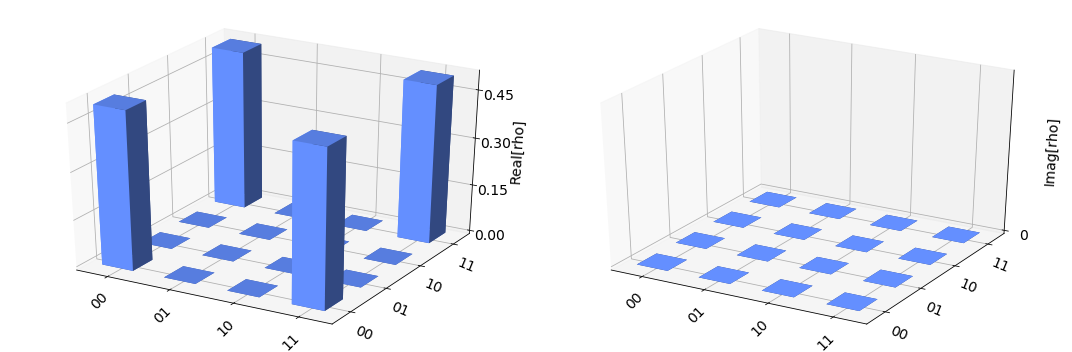

In [16]:
# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)
plot_state_city(psi)


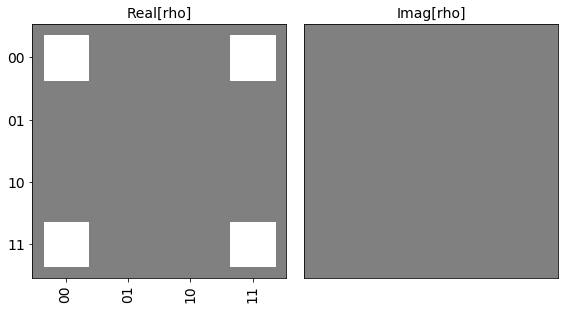

In [17]:
plot_state_hinton(psi)


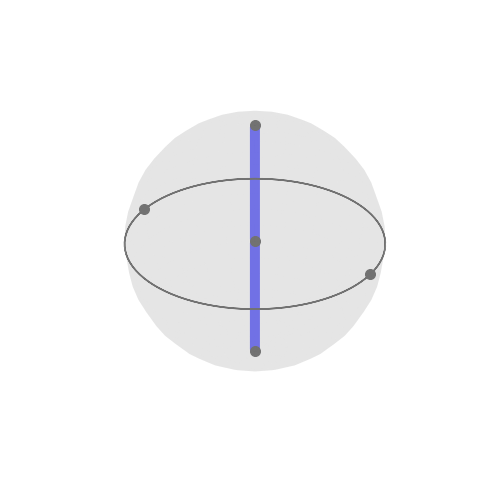

In [18]:
plot_state_qsphere(psi)


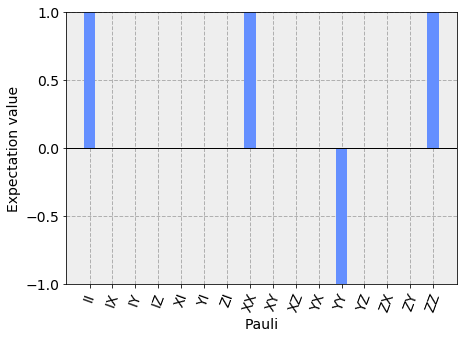

In [19]:
plot_state_paulivec(psi)

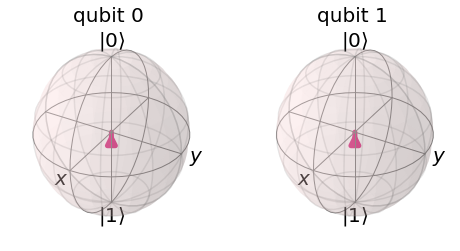

In [20]:
plot_bloch_multivector(psi)